In [3]:
import pandas as pd
from Genome.goldstandard_pair.lls import *

# read joined goldstandard and network for evaluation
all_chunk = pd.read_csv('~/data0118/joined_smpl/refseq_GO_smpl_rm_plasmid', header = 0)

In [5]:
all_chunk.shape # there is a lot of edges to evaluate, so it is ok to take hundreds of bins

(995879, 5)

# The old linear regression method of fitting lls score is not working well

In [ ]:
# calculate LLS score for 250 bins
lls_score = lls_for_other(all_chunk, 'nrm_mutual', bins = 250)

# do OLD METHOD: linear regression when LLS > threshold
true_thres, slope, intercept = lls_regress_thres(lls_score, lls_threshold = 1)
new_lls = map_lls(lls_score, true_thres, slope, intercept)

In [7]:
%matplotlib inline
def wrap_for_diff_score(score, all_chunk):
    lls_score = lls_for_other(all_chunk, score)
    true_thres, slope, intercept = lls_regress_thres(lls_score)
    new_lls = map_lls(lls_score, true_thres, slope, intercept)
    all_chunk = map_score_to_lls(all_chunk, new_lls, score)
    tradeoff = try_diff_lls_thres(all_chunk)
    return(new_lls, all_chunk,lls_score, tradeoff, true_thres)

In [8]:
new_lls, all_chunk,lls_score, tradeoff, true_thres = wrap_for_diff_score('mutual_info', all_chunk)

Text(0.5, 0, 'bins')

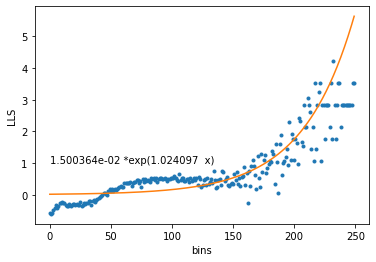

In [21]:
lls_score = lls_for_other(all_chunk, 'nrm_mutual', bins = 250)
subset = lls_score.copy()

smallest_nonneg = subset[subset>0].min()
subset.loc[subset<0] = smallest_nonneg
y = subset.values
x = np.array(range(len(y)))
import numpy as np
top_bins = 300/2
new = np.polyfit(x[-0:], np.log(y[-0:]), 1) #y = Ae*bx

import matplotlib.pyplot as plt
plt.plot(lls_score, '.')
plt.plot(np.exp(new[1]) * np.exp(new[0]*np.array(x)))
plt.text(0.5, 1, '{0:e} *exp({1:2f}  x)'.format(np.exp(new[1]), np.exp(new[0])))
plt.ylabel('LLS')
plt.xlabel('bins')

array([249])

In [10]:
values = np.exp(new[1]) * np.exp(new[0]*np.array(x))
new_lls = pd.Series(index = lls_score.index, data = values)

In [7]:
sum(np.exp(new[1]) * np.exp(new[0]*np.array(x))>1)

60

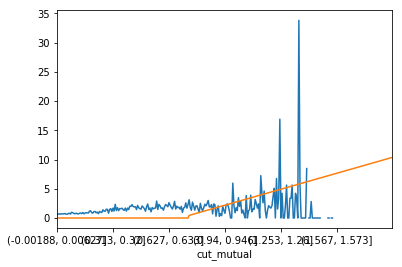

In [9]:
lls_score.plot()
new_lls.plot()

Text(0, 0.5, 'PPV')

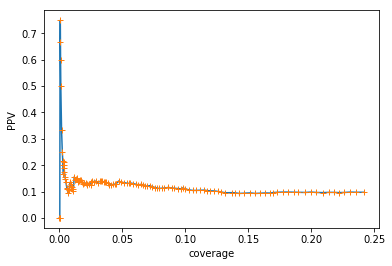

In [10]:
import matplotlib.pyplot as plt
plt.plot(tradeoff['coverage'], tradeoff['PPV'], '-')
plt.plot(tradeoff['coverage'], tradeoff['PPV'], '+')
plt.xlabel('coverage')
plt.ylabel('PPV')

In [11]:
new_lls, all_chunk,lls_score, tradeoff, true_thres = wrap_for_diff_score('nrm_mutual', all_chunk)

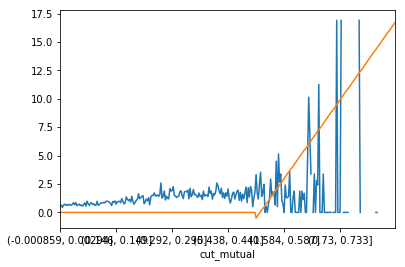

In [12]:
lls_score.plot()
new_lls.plot()

Text(0, 0.5, 'PPV')

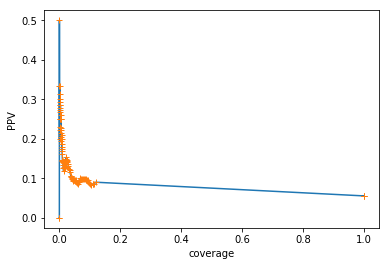

In [13]:
import matplotlib.pyplot as plt
plt.plot(tradeoff['coverage'], tradeoff['PPV'], '-')
plt.plot(tradeoff['coverage'], tradeoff['PPV'], '+')
plt.xlabel('coverage')
plt.ylabel('PPV')

Interval(-0.000947, 0.00384, closed='right')

In [14]:
tradeoff.to_csv('~/data0118/PPV_coverage/refseq_300_nrm_mutual_rm_plasmid')

In [ ]:
output = '/home/hermuba/data0118/network1122/refseq_lls_rm_plasmid_edgelist_exp'
# map LLS_reg back to each "whole" network
map_lls_to_whole_data(net, new_lls, 'mutual_info', lls_score.index[0], output, 'refseq')

/home/hermuba/resistanceExp/Genome/goldstandard_pair/lls.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['lls'] = all_df[score].map(new_lls)
/home/hermuba/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/home/hermuba/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

(40377, 5)
4.265562839979427
(19, 5)
(40972, 5)
4.265562839979427
(17, 5)
(39114, 5)
4.265562839979427
(9, 5)
(41525, 5)
4.265562839979427
(19, 5)
(39914, 5)
4.265562839979427
(26, 5)
(42591, 5)
4.265562839979427
(30, 5)
(42140, 5)
4.265562839979427
(15, 5)
(38427, 5)
4.265562839979427
(14, 5)
(41289, 5)
4.265562839979427
(22, 5)
(38995, 5)
4.265562839979427
(19, 5)
(40265, 5)
4.265562839979427
(13, 5)
(68628, 5)
4.265562839979427
(103, 5)
(57208, 5)
4.265562839979427
(137, 5)
(74929, 5)
4.265562839979427
(490, 5)
(40999, 5)
4.265562839979427
(32, 5)
(40547, 5)
4.265562839979427
(64, 5)
(40450, 5)
4.265562839979427
(51, 5)
(37929, 5)
4.265562839979427
(44, 5)
(41385, 5)
4.265562839979427
(70, 5)
(42627, 5)
4.265562839979427
(87, 5)
(43198, 5)
4.265562839979427
(76, 5)
(39129, 5)
4.265562839979427
(50, 5)
(39087, 5)
4.265562839979427
(62, 5)
(40556, 5)
4.265562839979427
(79, 5)
(38869, 5)
4.265562839979427
(47, 5)
(57579, 5)
4.265562839979427
(202, 5)
(62532, 5)
4.265562839979427
(234, 